# RiiMaterial Class
```
RiiMaterial(id: int, catalog: DataFrame, raw_data: DataFrame, bound_check: bool = True)
```
This class provides the dielectric function for the material specified by given id. If the argument __bound_check__ is True, ValueError is raised when the wavelength exeeds the domain of experimental data.

In [1]:
import riip
ri = riip.RiiDataFrame()
water = riip.RiiMaterial(428, ri.catalog, ri.raw_data)
print(f"{water.catalog['book']} {water.catalog['page']}")
print(f"{water.catalog['wl_min']} <= λ <= {water.catalog['wl_max']}")

H2O Kedenburg
0.5 <= λ <= 1.6


## Reflactive Index __n__
```
n(wl: ArrayLike) -> numpy.ndarray
```
## Extinction Coefficient __k__
```
k(wl: ArrayLike) -> numpy.ndarray
```
## Dielectric Function __eps__
```
eps(wl: ArrayLike) -> numpy.ndarray
```
Wavelengths __wl__ can be given as a single complex value or an array of complex values.

In [2]:
wl = 1.0
n = water.n(wl)
k = water.k(wl)
eps = water.eps(wl)
print(f"At λ={wl}μm:")
print(f"  n={n}")
print(f"  k={k}")
print(f"  ε={eps}")

At λ=1.0μm:
  n=1.3248733548067675
  k=3.19106e-06
  ε=(1.755289406266756+8.455500735179367e-06j)


In [3]:
import numpy as np
wls = np.linspace(0.5, 1.6)
water.eps(wls)

array([1.78768541+5.06456045e-09j, 1.78467437+7.15205496e-09j,
       1.78200425+8.94726970e-09j, 1.77961713+1.08666065e-08j,
       1.77746656+2.03456790e-08j, 1.77551486+3.91797098e-08j,
       1.77373123+4.46648626e-08j, 1.77209021+5.55516860e-08j,
       1.77057063+6.46736868e-08j, 1.76915476+9.55086451e-08j,
       1.7678276 +2.26809001e-07j, 1.76657643+4.35996520e-07j,
       1.76539035+4.41911135e-07j, 1.76425999+3.88897897e-07j,
       1.76317722+3.67527138e-07j, 1.76213497+6.57038199e-07j,
       1.76112705+7.97313691e-07j, 1.76014799+9.89984646e-07j,
       1.75919296+1.26258703e-06j, 1.75825763+2.11417683e-06j,
       1.75733815+5.56077734e-06j, 1.75643103+9.70066579e-06j,
       1.75553309+9.02235619e-06j, 1.75464145+6.69285893e-06j,
       1.75375346+4.42035410e-06j, 1.75286666+3.28212930e-06j,
       1.75197876+3.47790570e-06j, 1.75108763+4.87739542e-06j,
       1.75019124+7.76700844e-06j, 1.74928768+2.36805425e-05j,
       1.74837512+2.93316807e-05j, 1.74745178+3.1702583

## Bound_check
By default, __bound_check__ is set to __True__, so a ValueError is raised if the given range of wavelength exeeds the domain of experimental data.

In [4]:
wls = np.linspace(1.0, 2.0)  # exeeds the domain of experimental data [wl_min, wl_max]
water = riip.RiiMaterial(428, ri.catalog, ri.raw_data)
try:
    water.eps(wls)
except ValueError as e:
    print("ValueError: ", e)

ValueError:  Wavelength [1.0 2.0] is out of bounds [0.5 1.6][um]


If the instance is created with _bound_check_=False, the dispersion formula is applied beyond the scope of experimental data.

In [5]:
water = ri.material(428, bound_check=False)
water.eps(wls)

array([1.75528941+8.45550074e-06j, 1.7544798 +6.22861833e-06j,
       1.75367283+4.26777142e-06j, 1.75286666+3.28212930e-06j,
       1.75205958+3.40958327e-06j, 1.75124999+4.57539314e-06j,
       1.75043634+6.43219717e-06j, 1.7496172 +1.73159504e-05j,
       1.74879115+2.79107526e-05j, 1.74795686+3.03863024e-05j,
       1.74711301+3.16625864e-05j, 1.74625834+3.09037928e-05j,
       1.7453916 +2.96001344e-05j, 1.74451155+2.87261241e-05j,
       1.74361698+3.09576021e-05j, 1.74270668+3.94605082e-05j,
       1.74177943+5.74328831e-05j, 1.74083401+8.45012883e-05j,
       1.73986919+1.12277638e-04j, 1.73888371+2.38893947e-04j,
       1.73787627+5.97354544e-04j, 1.73684562+7.93195467e-04j,
       1.73579043+8.44647738e-04j, 1.73470932+8.36225191e-04j,
       1.73360089+7.44545306e-04j, 1.73246365+6.09033937e-04j,
       1.73129606+4.84067121e-04j, 1.73009655+3.87576718e-04j,
       1.72886346+3.10291027e-04j, 1.72759506+2.69631077e-04j,
       1.72628955+2.42340278e-04j, 1.72494502+2.2370766

## __plot__
```
plot(wls: Sequence | np.ndarray, comp: str = "n", fmt1: Optional[str] = "-", fmt2: Optional[str] = "--", **kwargs)
```
* wls (Sequence | np.ndarray): Wavelength coordinates to be plotted [μm].
* comp (str): 'n', 'k' or 'eps'
* fmt1 (Optional[str]): Plot format for n and Re(eps).
* fmt2 (Optional[str]): Plot format for k and Im(eps).

Plot refractive index (if set comp="n"), extinction coefficient (comp="k") or permittivity (comp="eps").

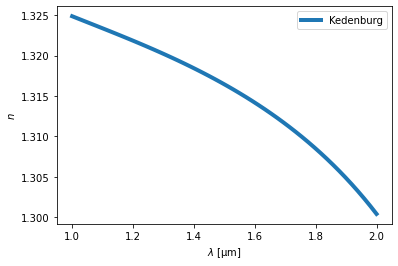

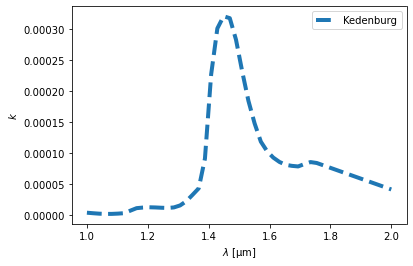

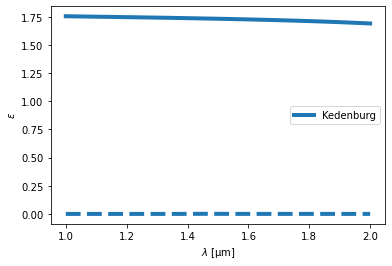

In [6]:
import matplotlib.pyplot as plt
water.plot(wls, "n")
plt.show()
water.plot(wls, "k")
plt.show()
water.plot(wls, "eps")

You can change plot style usint rcParams.

In [7]:
plt.style.use('seaborn-notebook')
plot_params = {
    'figure.figsize': [6.0, 6.0],
    'axes.labelsize': 'xx-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large',
    'legend.fontsize': 'x-large',
}
plt.rcParams.update(plot_params)

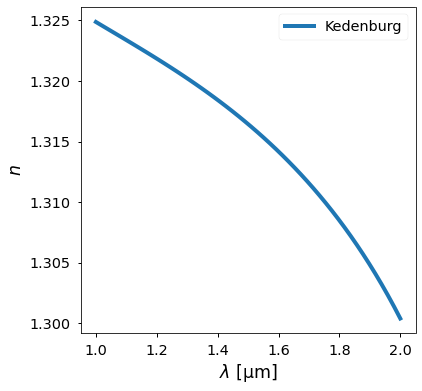

In [8]:
water.plot(wls, "n")